# Basic prime check function

In [31]:
def is_prime(x):
    if x < 2:
        return False, x
    v = 2
    while v * v <= x:
        if x % v == 0:
            return False, v
        v += 1
    return True, 1

In [32]:
print(is_prime(31))

(True, 1)


# Fast sieve function

In [33]:
# Fastest sieve I know
# Taken from https://www.geeksforgeeks.org/sieve-of-atkin/

def SieveOfAtkin(limit):
    # 2 and 3 are known
    # to be prime
    ans = []
    if limit > 2:
        ans.append(2)
    if limit > 3:
        ans.append(3)
 
    # Initialise the sieve
    # array with False values
    sieve = [False] * (limit + 1)
    for i in range(0, limit + 1):
        sieve[i] = False
 
    '''Mark sieve[n] is True if
    one of the following is True:
    a) n = (4*x*x)+(y*y) has odd
    number of solutions, i.e.,
    there exist odd number of
    distinct pairs (x, y) that
    satisfy the equation and
    n % 12 = 1 or n % 12 = 5.
    b) n = (3*x*x)+(y*y) has
    odd number of solutions
    and n % 12 = 7
    c) n = (3*x*x)-(y*y) has
    odd number of solutions,
    x > y and n % 12 = 11 '''
    x = 1
    while x * x <= limit:
        y = 1
        while y * y <= limit:
 
            # Main part of
            # Sieve of Atkin
            n = (4 * x * x) + (y * y)
            if (n <= limit and (n % 12 == 1 or
                                n % 12 == 5)):
                sieve[n] ^= True
 
            n = (3 * x * x) + (y * y)
            if n <= limit and n % 12 == 7:
                sieve[n] ^= True
 
            n = (3 * x * x) - (y * y)
            if (x > y and n <= limit and
                    n % 12 == 11):
                sieve[n] ^= True
            y += 1
        x += 1
 
    # Mark all multiples of
    # squares as non-prime
    r = 5
    while r * r <= limit:
        if sieve[r]:
            for i in range(r * r, limit+1, r * r):
                sieve[i] = False
 
        r += 1
    
    for a in range(5, limit+1):
        if sieve[a]:
            ans.append(a)
    
    return ans

             

In [34]:
limit = 1e6+1
primes_lst = SieveOfAtkin(int(limit))[1:]
primes = {prime_i: True for prime_i in primes_lst}
print(primes_lst[:100])

[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547]


# Number of primes up to a number

In [42]:
def primes_up_to_limit_LIST(limit):
    even_numbers_lst = [2 * v for v in range(3,limit//2+1)]
    result = {2 * v:None for v in range(3,limit//2+1)}

    current_even_idx = 0

    p_idx = 0
    while p_idx < len(primes_lst) and current_even_idx < len(even_numbers_lst):
        prime = primes_lst[p_idx] 
        if prime < even_numbers_lst[current_even_idx]:
            p_idx += 1
            continue
        result[even_numbers_lst[current_even_idx]] = p_idx+1
        current_even_idx += 1

    return result

In [43]:
primes_up_to_limit_LIST(10)

{6: 3, 8: 4, 10: 4}

# The number of primes needed to fulfill the golbach conjecture up to a certain even number
It takes into consideration the sum:
- 3 + 3
- 5 + 3
- 5 + 5
- 7 + 3
- 7 + 5
- 7 + 7
- 11 + 3
- 11 + 5
- 11 + 7
- 11 + 11
- ...

The function returns the prime $p_i$ for an input $2k$ if $p_i$ is the minimum prime such that all of the sums using $p_i$ or a smaller prime fulfills all even numbers up to $2k$.

In [9]:
def get_number_of_primes_to_fulfill(limit):
    even_numbers = {2 * v:True for v in range(3,limit//2+1)}

    repetitions = 0

    for idx, prime_1 in enumerate(primes_lst):
        for _, prime_2 in enumerate(primes_lst[:idx+1]):
            sum = prime_1 + prime_2
            assert sum % 2 == 0
            if sum in even_numbers:
                del even_numbers[sum]
                if len(even_numbers) == 0:
                    return idx + 1, repetitions
            else:
                repetitions += 1
    
    if len(even_numbers) > 0:
        raise AssertionError("Don't have enough primes")
    
    return idx, repetitions
                


In [10]:
get_number_of_primes_to_fulfill(10)

(2, 0)

In [13]:
def get_number_of_primes_to_fulfill_LIST(limit):
    even_numbers_lst = [2 * v for v in range(3,limit//2+1)]
    even_numbers = {2 * v:True for v in range(3,limit//2+1)}
    result = {even_number_i: None for even_number_i in even_numbers}
    result_max_up_to = {even_number_i: None for even_number_i in even_numbers}


    for idx, prime_1 in enumerate(primes_lst):
        for _, prime_2 in enumerate(primes_lst[:idx+1]):
            sum = prime_1 + prime_2
            assert sum % 2 == 0
            if sum in even_numbers:
                del even_numbers[sum]
                result[sum] = idx+2
                if len(even_numbers) == 0:
                    break
        
        if len(even_numbers) == 0:
            break

    if len(even_numbers) > 0:
        raise AssertionError("Don't have enough primes")
    
    max_values = None
    for ev_number in even_numbers_lst:
        if max_values is None:
            max_values = result[ev_number]
        else:
            max_values = max(max_values, result[ev_number])
        result_max_up_to[ev_number] = max_values
    
    return result_max_up_to
                


In [14]:
get_number_of_primes_to_fulfill_LIST(100)

{6: 2,
 8: 3,
 10: 3,
 12: 4,
 14: 4,
 16: 5,
 18: 5,
 20: 6,
 22: 6,
 24: 6,
 26: 6,
 28: 7,
 30: 7,
 32: 8,
 34: 8,
 36: 8,
 38: 8,
 40: 9,
 42: 9,
 44: 11,
 46: 11,
 48: 11,
 50: 11,
 52: 11,
 54: 11,
 56: 12,
 58: 12,
 60: 12,
 62: 12,
 64: 13,
 66: 13,
 68: 13,
 70: 13,
 72: 13,
 74: 13,
 76: 15,
 78: 15,
 80: 15,
 82: 15,
 84: 15,
 86: 15,
 88: 15,
 90: 15,
 92: 18,
 94: 18,
 96: 18,
 98: 18,
 100: 18}

In [64]:
x_max = 4 * 1e5

x = list(range(10,int(x_max)+1,2))

y_map = get_number_of_primes_to_fulfill_LIST(int(x_max))
number_of_primes_necessary = []
for xi in x:
    number_of_primes_necessary.append(y_map[xi])

number_of_primes_up_to_map = primes_up_to_limit_LIST(int(x_max))
number_of_primes = []
for xi in x:
    number_of_primes.append(number_of_primes_up_to_map[xi])

/var/folders/0k/cdzy3_mj1jj_23zzmclcqhlw0000gn/T/ipykernel_1509/297753293.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  y_test = [xi/(math.log10(xi)**2) for xi in x_test]
/var/folders/0k/cdzy3_mj1jj_23zzmclcqhlw0000gn/T/ipykernel_1509/297753293.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  y_test = [xi/(math.log(xi)) for xi in x_test]


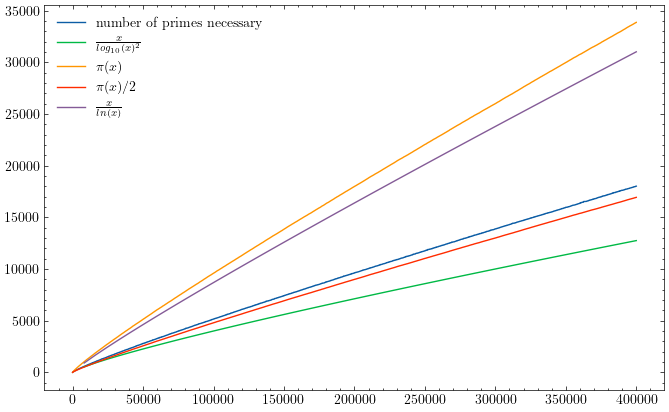

In [65]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import math

with plt.style.context(["science"]):

    fig, ax = plt.subplots(figsize = (8,5))

    plt.plot(x, number_of_primes_necessary, label = "number of primes necessary")

    x_test = np.linspace(1,x_max)
    y_test = [xi/(math.log10(xi)**2) for xi in x_test]
    plt.plot(x_test, y_test, label = "$\\frac{x}{log_{10}(x)^2}$")

    plt.plot(x, number_of_primes, label ="$\\pi (x)$")
    plt.plot(x, [v/2 for v in number_of_primes], label = "$\\pi (x)/2$")

    x_test = np.linspace(1,x_max)
    y_test = [xi/(math.log(xi)) for xi in x_test]
    plt.plot(x_test, y_test, label = "$\\frac{x}{ln(x)}$")

    plt.legend()
    plt.show()


# Error between number of primes necessary and pi(x)/2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


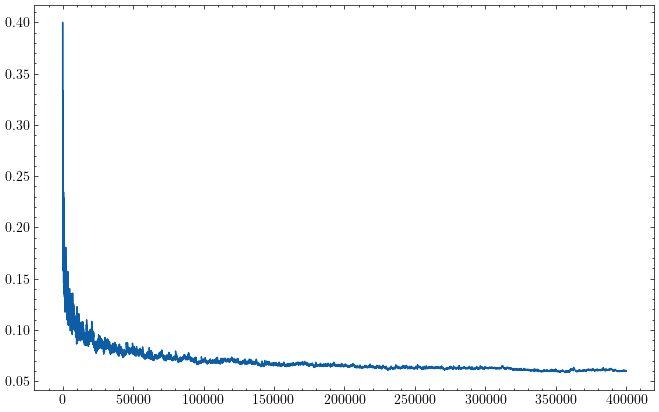

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.059966685174902834


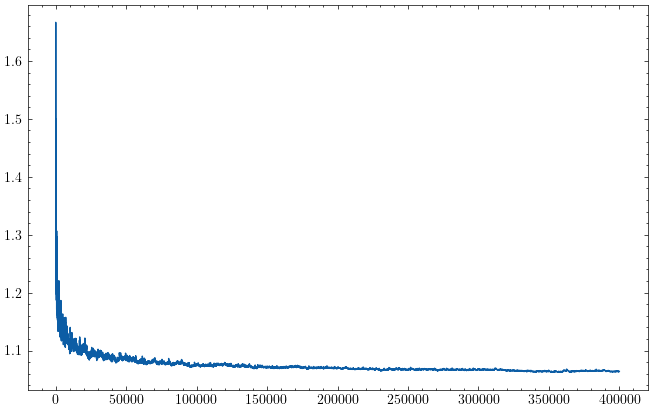

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.0637920850561133


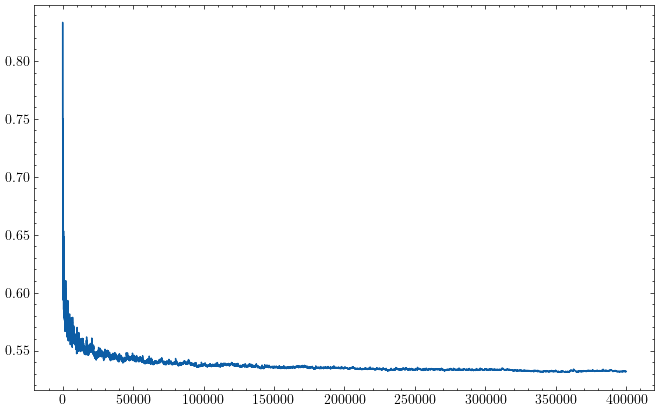

0.5318960425280567


In [73]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import math

with plt.style.context(["science"]):

    fig, ax = plt.subplots(figsize = (8,5))

    plt.plot(x, [(number_of_primes_necessary[i]-(number_of_primes[i]/2))/number_of_primes_necessary[i] for i in range(len(number_of_primes_necessary))])


    plt.legend()
    plt.show()

print((number_of_primes_necessary[-1]-(number_of_primes[-1]/2))/number_of_primes_necessary[-1])

with plt.style.context(["science"]):

    fig, ax = plt.subplots(figsize = (8,5))

    plt.plot(x, [(number_of_primes_necessary[i]/(number_of_primes[i]/2)) for i in range(len(number_of_primes_necessary))])


    plt.legend()
    plt.show()
print(number_of_primes_necessary[-1]/(number_of_primes[-1]/2))

with plt.style.context(["science"]):

    fig, ax = plt.subplots(figsize = (8,5))

    plt.plot(x, [(number_of_primes_necessary[i]/(number_of_primes[i])) for i in range(len(number_of_primes_necessary))])


    plt.legend()
    plt.show()
print(number_of_primes_necessary[-1]/(number_of_primes[-1]))